# 홀트계절지수평활법 실습
월별, 분기별 자료들은 보통 계절변동을 포함(추세\+계절\+자료변동(=level))하는 경우가 많습니다.<br/>
참고로 자료변동은 불규칙에 포함됩니다.<br/>

이렇게 데이터에서 계절성이 보인다면 **계절지수평활법**을 적용하는 것이 좋습니다.<br/>
파라미터로 구분되는 두가지의 메소드가 있습니다.<br/>
* 승법적 계절지수평활법(곱하기 이용)<br/>
* 가법적 계절지수평활법(더하기 이용)<br/>

첫번째가 추세에 관련된 식, 두 번째는 계절에 관련된 식, 세번째는 자료변동에 관한 식이 나올건데 이식들을 다 더해서 해결하면 가법적인 것이고, 곱해서 이용하게되면 승법적인것이 되는 것입니다.<br/>

함수로는 hw라고 표기하며 그 안에 승법으로 할지, 가법으로할지 고르면 됩니다.<br/>

그렇다면 둘 중 어떤걸 어떤 때에 사용하면 될지 확인해봅시다.<br/>
시계열의 계절적 진폭이 점차적으로 증가/감소하는 특성을 가지면 승법, 시간의 흐름에 따라 일정한 특성을 가지는 경우엔 가법적을 사용하시면됩니다.<br/>
왔다갔다 진동하는것이 기본적으로 계절적 변동인데, 높낮이가 일정하면 가법적, 진폭이 점점 커지거나 감소되는 데이터의 형태는 승법적인 모형을 적용하시면 됩니다.<br/>

탐색적으로 데이터를 먼저 도식화해보고 어느 모형을 쓸지 결정하시면 됩니다.<br/>
하지만 이렇게 확실하게 눈에 띄는 경우에는 바로 사용가능하겠지만, 잘 드러나지않고 헷갈린다면 둘다 써보면됩니다.<br/>


Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,10171.370,11642.047,10959.327,9631.822,8113.867,7687.780,9488.412,6824.398,7994.816,8849.314,12206.115,11333.561
2011,8727.824,10572.496,16415.667,15322.153,15185.645,15163.094,14389.188,20601.666,18647.374,23842.528,22023.714,25808.477
2012,18701.063,24248.366,25582.786,27755.428,23754.305,24500.540,22192.803,25346.644,21087.194,22098.436,22322.298,17995.997
2013,15670.293,20526.126,21747.386,23859.140,20456.819,18806.497,20355.904,20408.184,23351.360,27050.859,27843.960,25731.259
2014,19108.375,27828.546,25807.760,30713.500,20744.789,25142.929,25815.333,25712.026,26163.303,30937.711,28955.434,31841.921
2015,21774.958,27800.336,31702.518,35253.927,26569.231,32082.366,30595.872,30578.924,33006.815,38044.226,35767.920,31595.067
2016,28039.202,29307.442,41641.324,38111.414,34080.118,33585.952,35442.221,43185.803,29489.532,44859.685,42836.563,40201.332


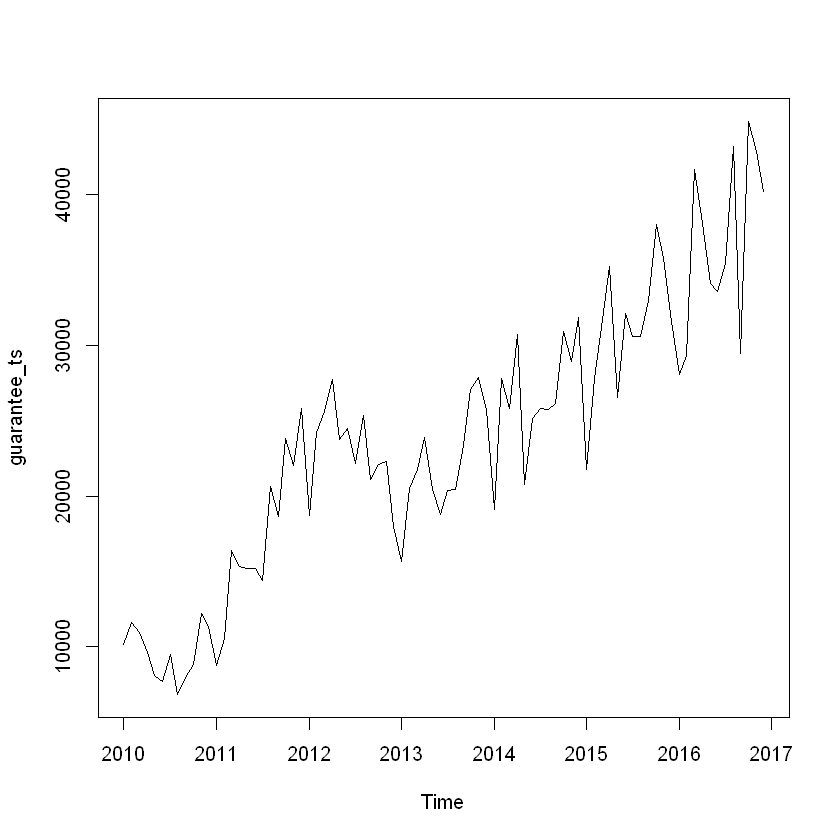

In [1]:
library(forecast)

guarantee <- read.csv("guarantee.csv")
guarantee_ts <- ts(guarantee$gurantee, start=c(2010,1), frequency = 12)
guarantee_ts

plot(guarantee_ts)

In [2]:
# 가법
fit1_gurantee_ts <- hw(guarantee_ts, seasonal = "additive", h=12)

# 승법
fit2_guarntee_ts <- hw(guarantee_ts, seasonal = "multiplicative", h=12)


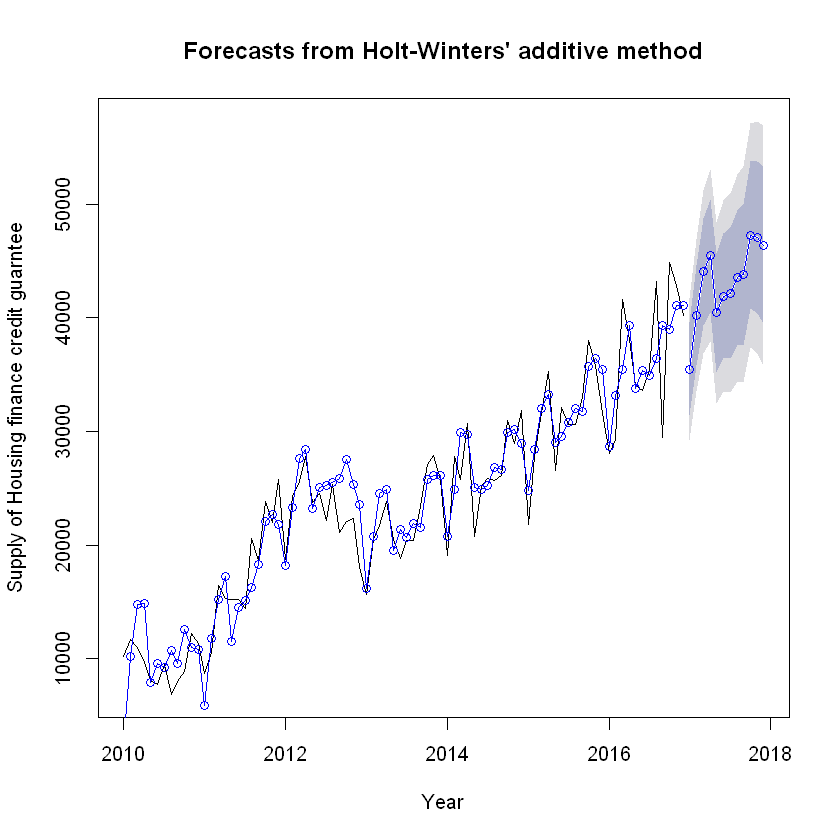

In [3]:
# 가법 plot
plot(fit1_gurantee_ts, type = "l", ylab = "Supply of Housing finance credit guarntee",
     xlab = "Year", fcol="white", lwd=1)
lines(fitted(fit1_gurantee_ts), col="blue", type="o", pch=1, lwd=1)
# 예측값
lines(fit1_gurantee_ts$mean, col="blue", type="o", pch=1, lwd=1)


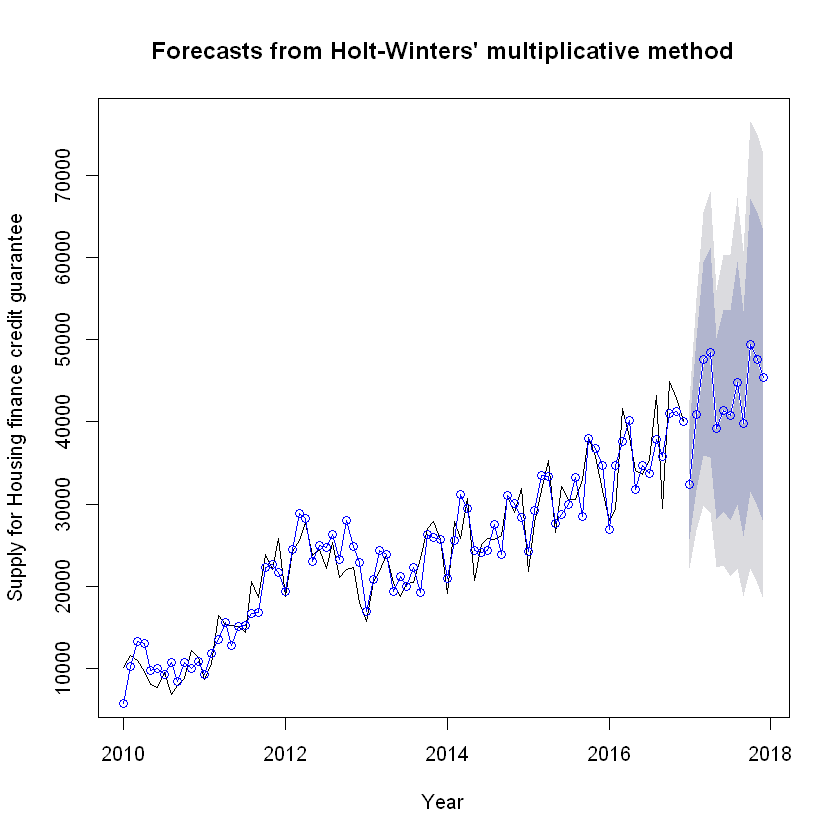

In [4]:
# 승법 plot
plot(fit2_guarntee_ts, type = "l", ylab = "Supply for Housing finance credit guarantee", 
     xlab = "Year", fcol = "white", lwd=1)
lines(fitted(fit2_guarntee_ts), col="blue", type="o",pch=1, lwd=1)
lines(fit2_guarntee_ts$mean, col="blue", type="o",pch=1, lwd=1)
